# NRK todo:

1) Write function to calculate assembly activation in line with van de Ven and Trouche papers: Rk(t) = z(t)T*pk*z(t).  Make SURE to zero out diagnoal in pk!!!
  
2) Plot out assembly activation for Marble07 day 2.  

3) Compare to previous method, directly multiplying the ica weight * PSAbool.

4) Figure out why ICAs are so similar for this method - plot out zproj, PCmats (Zproj_cov), etc. and compare between Marble07 day 1 and 2.  Is it because ICA is not converging? Or for some other reason?

5) Play around with FastICA params: random_state, n_iters, tol, etc...

6) Tidy up parameters ued for running this method. Make dictionary for PCA, ICA, and Lopes dos Santos (call it dupret?).  should have both pca and ica params for dupret, e.g. `params['dupret']['pca']['whiten'] = False`, `params['dupret']['pca']['whiten'] = True`


In [1]:
# Import useful modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec
import pandas as pd

In [2]:
# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

from session_directory import find_eraser_directory as get_dir
import er_plot_functions as erp
import Placefields as pf
import freezing_analysis as fa
import helpers 
import eraser_reference as err

# Project save directory here
print_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'

First, run some sanity checks on your outputs - do you see blatant differences in outputs like covariance matrices for Marble07 day 1 (few freezing ensembles) vs day 2?  As a reminder, Day 2 has tons of freeze related ensembles whereas Day 1 has relative few.

In [5]:
DR1 = fa.DimReduction('Marble07', 'Shock', 1)
DR2 = fa.DimReduction('Marble07', 'Shock', 2)

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


calculating Dupret activations for plotting
calculating Dupret activations for plotting


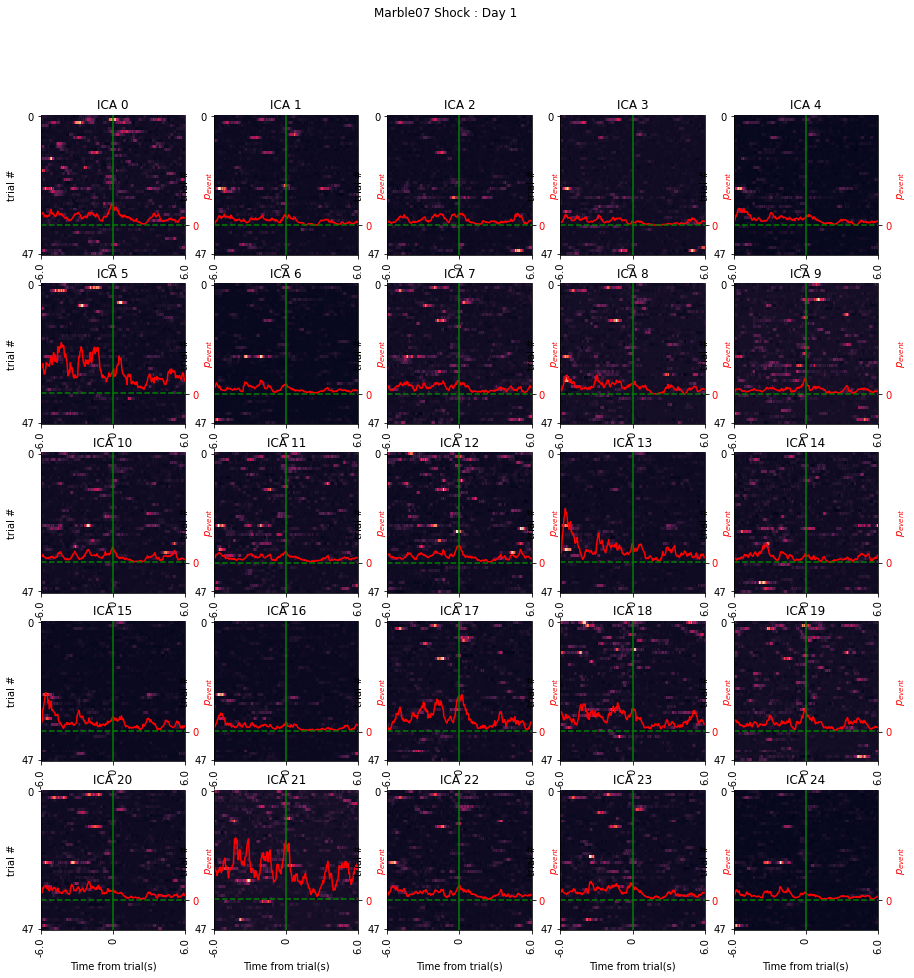

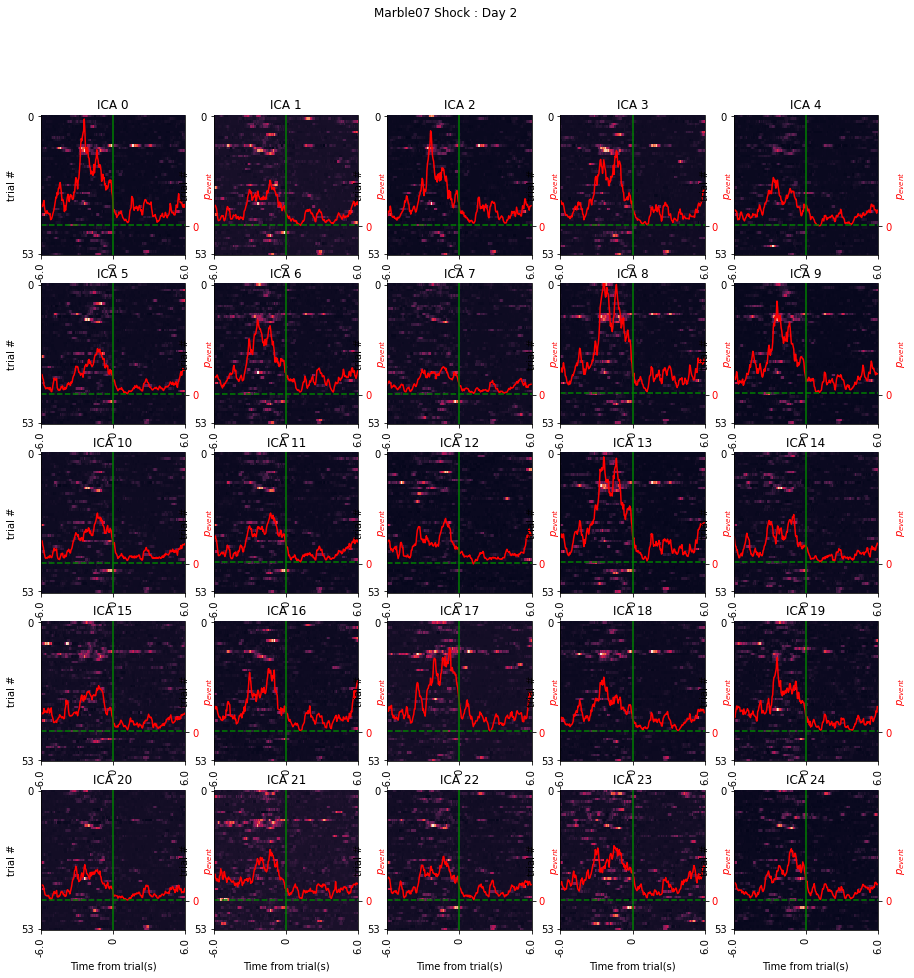

In [7]:
_ = DR1.plot_rasters(act_type='dupret', y2scale=3)
_ = DR2.plot_rasters(act_type='dupret', y2scale=3)

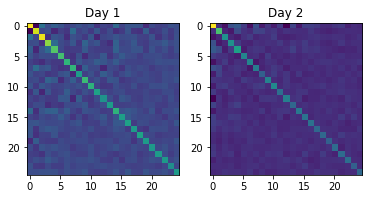

In [10]:
fig, ax = plt.subplots(1,2)
for a, DR in zip(ax, [DR1, DR2]):
    a.imshow(DR.cov_zproj)
    a.set_title('Day ' + str(DR.day))
    

Ok, super interesting.  Much less variability in PCs on day 2 than day 1, which might be why I'm getting such different results!  Check out distribution of weights - are they the same?  Also, try plotting the above with the diagonal zeroed out.  (Does the method have you do that???)